In [ ]:
#Imports necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
#Loads the dataset
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [ ]:
#Displays the first few rows
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
45641,42436,-2.481639,-2.439949,0.363642,1.216827,2.572442,-1.264220,-0.443652,0.075853,0.073188,...,-0.039426,0.480591,1.779358,-0.756700,-0.161099,0.685617,0.223071,0.139619,0.00,0.0
45642,42436,1.223475,0.014944,0.471312,-0.038410,-0.566793,-0.867970,-0.058213,-0.144080,0.164904,...,-0.053292,-0.093680,0.106348,0.471407,0.135555,0.968336,-0.065171,0.005184,7.49,0.0
45643,42436,1.258657,0.421016,0.325437,0.684259,-0.292529,-1.052786,0.145228,-0.253567,-0.100521,...,-0.278029,-0.757417,0.119613,0.369393,0.246145,0.091553,-0.017156,0.032557,0.89,0.0
45644,42437,-0.500147,1.000770,1.809639,-0.114551,0.333865,-0.577076,1.062325,-0.513050,-0.048285,...,-0.193814,-0.161410,0.036965,0.400154,-0.802486,-0.076097,-0.214317,-0.229160,2.69,0.0
45645,42437,-0.652459,0.177290,1.955607,-1.879724,-0.368457,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45646 entries, 0 to 45645
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    45646 non-null  int64  
 1   V1      45646 non-null  float64
 2   V2      45646 non-null  float64
 3   V3      45646 non-null  float64
 4   V4      45646 non-null  float64
 5   V5      45646 non-null  float64
 6   V6      45645 non-null  float64
 7   V7      45645 non-null  float64
 8   V8      45645 non-null  float64
 9   V9      45645 non-null  float64
 10  V10     45645 non-null  float64
 11  V11     45645 non-null  float64
 12  V12     45645 non-null  float64
 13  V13     45645 non-null  float64
 14  V14     45645 non-null  float64
 15  V15     45645 non-null  float64
 16  V16     45645 non-null  float64
 17  V17     45645 non-null  float64
 18  V18     45645 non-null  float64
 19  V19     45645 non-null  float64
 20  V20     45645 non-null  float64
 21  V21     45645 non-null  float64
 22

In [ ]:
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,1
V7,1
V8,1
V9,1


In [ ]:
credit_card_data['Class'].value_counts()

,count
Class,
0.0,45503
1.0,142


In [ ]:
#Data Balancing
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(45503, 31)
(142, 31)


In [ ]:
legit.Amount.describe()

,Amount
count,45503.000000
mean,90.808470
std,240.322652
min,0.000000
25%,7.580000
50%,24.990000
75%,82.360000
max,7879.420000


In [ ]:
fraud.Amount.describe()

,Amount
count,142.000000
mean,97.592183
std,233.185192
min,0.000000
25%,1.000000
50%,8.370000
75%,99.990000
max,1809.680000


In [ ]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,27549.332857,-0.21371,0.011525,0.732168,0.173212,-0.230885,0.106122,-0.092498,0.041321,0.169777,...,0.046284,-0.029987,-0.108242,-0.038246,0.009637,0.136319,0.021863,0.003681,0.004547,90.808470
1.0,26193.556338,-7.87188,5.609155,-10.671851,6.067972,-5.862266,-2.315720,-8.269674,3.901566,-3.650345,...,0.486666,0.898581,-0.250143,-0.300033,-0.079930,0.257712,0.163858,0.596174,0.034797,97.592183


In [ ]:
legit_sample = legit.sample(n=492)

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
11926,20560,1.144670,0.153188,0.249264,1.337540,0.242991,0.574099,-0.171196,0.132194,1.469385,...,-0.245208,-0.322910,-0.152030,-0.727499,0.672400,-0.325361,0.001013,-0.006517,22.99,0.0
1673,1297,-2.650763,-0.502878,0.044517,0.632482,-2.510895,1.704930,4.806347,-0.916465,-0.708087,...,-0.301132,0.448447,0.482856,0.178932,1.090110,-0.298197,0.085718,0.299531,838.20,0.0
35212,38015,0.467653,1.860530,-2.716528,1.232706,1.647725,-0.341387,0.450060,0.461392,-0.833245,...,-0.102447,-0.122114,-0.025167,-1.662603,-0.324859,-0.305493,0.149534,-0.075166,2.38,0.0
34786,37825,-2.694887,1.432356,0.963663,-0.518385,-1.442468,0.139679,1.601619,-0.245005,2.204926,...,-0.622559,0.047887,-0.061389,0.438234,0.445036,0.346263,0.589283,0.032893,214.93,0.0
10426,16872,-4.808234,3.825463,0.572914,-2.468428,-0.345840,-0.569531,1.024038,-0.664224,5.872938,...,-1.002513,-0.553806,0.122272,0.063365,0.344663,0.626272,1.407844,0.210983,0.69,0.0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
44091,41791,-7.222731,6.155773,-10.826460,4.180779,-6.123555,-3.114136,-6.895112,5.161516,-2.516477,...,0.912700,-0.630358,0.190887,-0.061263,0.379775,-0.266845,1.193695,0.257468,99.99,1.0
44223,41851,-19.139733,9.286847,-20.134992,7.818673,-15.652208,-1.668348,-21.340478,0.641900,-8.550110,...,-2.182692,0.520543,-0.760556,0.662767,-0.948454,0.121796,-3.381843,-1.256524,139.90,1.0
44270,41870,-20.906908,9.843153,-19.947726,6.155789,-15.142013,-2.239566,-21.234463,1.151795,-8.739670,...,-1.977196,0.652932,-0.519777,0.541702,-0.053861,0.112671,-3.765371,-1.071238,1.00,1.0
44556,41991,-4.566342,3.353451,-4.572028,3.616119,-2.493138,-1.090000,-5.551433,0.447783,-2.424414,...,2.674466,-0.020880,-0.302447,-0.086396,-0.516060,-0.295102,0.195985,0.141115,1.00,1.0
45203,42247,-2.524012,2.098152,-4.946075,6.456588,3.173921,-3.058806,-0.184710,-0.390420,-3.649812,...,0.027935,0.220366,0.976348,-0.290539,1.161002,0.663954,0.456023,-0.405682,1.00,1.0


In [ ]:
new_dataset['Class'].value_counts()

,count
Class,
0.0,492
1.0,142


In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,27881.686992,-0.313289,-0.005010,0.771991,0.213278,-0.367796,0.085819,-0.029384,0.058765,0.218128,...,0.084013,-0.029604,-0.077489,-0.027414,0.026443,0.130548,0.024194,0.017172,0.005132,110.240650
1.0,26193.556338,-7.871880,5.609155,-10.671851,6.067972,-5.862266,-2.315720,-8.269674,3.901566,-3.650345,...,0.486666,0.898581,-0.250143,-0.300033,-0.079930,0.257712,0.163858,0.596174,0.034797,97.592183


In [ ]:
 #Feature Selection(Target- 0 , 1)
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
print(X)

        Time         V1         V2         V3         V4         V5        V6  \
5112    4787   1.423625  -0.427683  -0.196879  -0.858368  -0.123673 -0.013871   
936      711  -0.431349   1.027694   2.670816   2.084787  -0.274567  0.286856   
123       78  -0.291241   1.515688   1.514355   2.518365   0.583648  0.425561   
237      158  -0.600816   0.922455  -0.135952  -1.259915   2.439824  3.330205   
3530    3015   0.089387   1.167408   0.404809   1.030094   0.350139 -1.318700   
...      ...        ...        ...        ...        ...        ...       ...   
11880  20451 -15.819179   8.775997 -22.804686  11.864868  -9.092361 -2.386893   
12070  20931 -16.367923   9.223692 -23.270631  11.844777  -9.462037 -2.450444   
12108  21046 -16.917468   9.669900 -23.736443  11.824990  -9.830548 -2.514829   
12261  21419 -17.467710  10.114816 -24.202142  11.805469 -10.198046 -2.579938   
12369  21662 -18.018561  10.558600 -24.667741  11.786180 -10.564657 -2.645681   

              V7        V8 

In [ ]:
print(Y)

11926    0.0
1673     0.0
35212    0.0
34786    0.0
10426    0.0
        ... 
44091    1.0
44223    1.0
44270    1.0
44556    1.0
45203    1.0
Name: Class, Length: 634, dtype: float64


In [ ]:
#Splitting the Data(Split Data into 80% and 20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(634, 30) (507, 30) (127, 30)


In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9881656804733728


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.968503937007874


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on Training data:  0.9580888516345348
Accuracy on Test data:  0.959866220735786
Precision on Test data:  0.9484536082474226
Accuracy on Training data with HPC:  0.6705783738474435
Accuracy on Test data with HPC:  0.6588628762541806
Precision on Test data with HPC:  0.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


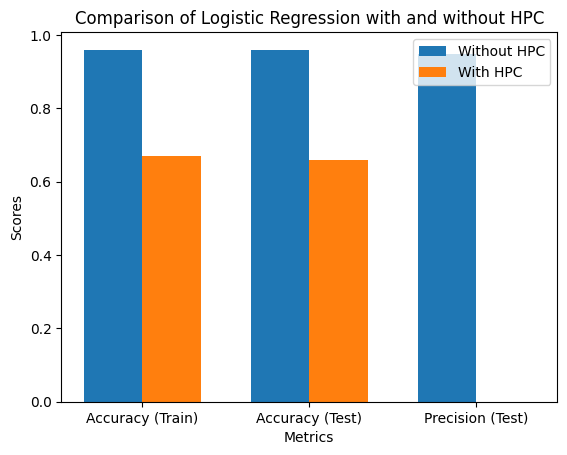

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score
import matplotlib.pyplot as plt

# Load the dataset
credit_card_data = pd.read_csv('/content/creditcard.csv')

# Check for null values and data information
credit_card_data.info()
credit_card_data.isnull().sum()

# Check the distribution of the target variable
print(credit_card_data['Class'].value_counts())

# Separate the data into legitimate and fraudulent transactions
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

# Sample the legitimate transactions to balance the dataset
legit_sample = legit.sample(n=1000) # Increased sample size for better representation

# Concatenate the sampled legitimate transactions with fraudulent transactions
new_dataset = pd.concat([legit_sample, fraud], axis=0)

# Define features (X) and target (Y)
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Logistic Regression without HPC
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

# Predictions on training and testing sets
X_train_prediction = model.predict(X_train)
X_test_prediction = model.predict(X_test)

# Calculate accuracy and precision
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
test_data_precision = precision_score(Y_test, X_test_prediction)

print('Accuracy on Training data: ', training_data_accuracy)
print('Accuracy on Test data: ', test_data_accuracy)
print('Precision on Test data: ', test_data_precision)

# Logistic Regression with HPC (using solver='saga' and n_jobs=-1 for parallel computation)
model_hpc = LogisticRegression(solver='saga', max_iter=1000, n_jobs=-1)
model_hpc.fit(X_train, Y_train)

# Predictions on training and testing sets
X_train_prediction_hpc = model_hpc.predict(X_train)
X_test_prediction_hpc = model_hpc.predict(X_test)

# Calculate accuracy and precision
training_data_accuracy_hpc = accuracy_score(Y_train, X_train_prediction_hpc)
test_data_accuracy_hpc = accuracy_score(Y_test, X_test_prediction_hpc)
test_data_precision_hpc = precision_score(Y_test, X_test_prediction_hpc)

print('Accuracy on Training data with HPC: ', training_data_accuracy_hpc)
print('Accuracy on Test data with HPC: ', test_data_accuracy_hpc)
print('Precision on Test data with HPC: ', test_data_precision_hpc)

# Plotting the bar graph
metrics = ['Accuracy (Train)', 'Accuracy (Test)', 'Precision (Test)']
values_without_hpc = [training_data_accuracy, test_data_accuracy, test_data_precision]
values_with_hpc = [training_data_accuracy_hpc, test_data_accuracy_hpc, test_data_precision_hpc]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, values_without_hpc, width, label='Without HPC')
rects2 = ax.bar(x + width/2, values_with_hpc, width, label='With HPC')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Logistic Regression with and without HPC')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

